In [25]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

np.set_printoptions(precision=4, linewidth=100)

## Objective

- We want to study the score in a exam on the basis of study time.

    $y = m \cdot x + c$

- Our Data points are: ($x_i, y_i$)
- The predicted data point for a given $x$ will be $\hat{y}_i$.

- Mean squared error function:

    $E = \frac{1}{n} \cdot \sum_{i=0}^n (y_i- \hat{y}_i)^2 = \frac{1}{n} \cdot \sum_{i=0}^n (y_i- (m\cdot x_i + b))^2$

- We need to calculate $m$ and $b$ by minimizing the function $E$. We can calculate the di=erivative wrt $m$ and $b$ and set it to zero.
    
    $\frac{\partial E}{\partial m} = - \frac{2}{n} \cdot \sum_{i=0}^n x_i (y_i- (m\cdot x_i + b))$

    $\frac{\partial E}{\partial m} = - \frac{1}{n} \cdot \sum_{i=0}^n (y_i- (m\cdot x_i + b))$

    If we want to improve $m$ and $b$ then all we need to do is  with each itteration we say take the current values of $m$ and assign it to following equations respectively:

    New $m$ and new $b$ will be written in terms of current $m$ and current $b$, and the the direction of the steepest ascent $\partial E/\partial (a ~{\rm or}~ m)$ as: 
    
    $m = m -\alpha \cdot \frac{\partial E}{\partial m}$ 
    
    $b = m -\alpha \cdot \frac{\partial E}{\partial b}$ 

    where $\alpha$ is a learning rate and it signifies how big or how large the steps we take.  Now large is $\alpha$, faster we get to the actual optimization but for lower $\alpha$, the better the results is going to be. Beacuase we are paying attention to details  much more. 


Generating a random dataset with a column of 'Study time' and 'Score'.

In [66]:
# Generating the dataset for study time and score in an exam
np.random.seed(42)

study_time = np.random.uniform(low=0.5, high=4.0, size=100)
score = 10 * study_time + np.random.normal(loc=0, scale=5, size=100)

# Create a DataFrame from the generated data
df = pd.DataFrame({'studytime': study_time, 'score': score})

# Save the DataFrame to a CSV file
df.to_csv('Study-dataset.csv', index=False)

# Load the CSV file into a DataFrame
data_df = pd.read_csv('Study-dataset.csv')
data_df.head()


,studytime,score
0,1.810890,18.544140
1,3.827500,36.779964
2,3.061979,31.078592
3,2.595305,16.015202
4,1.046065,9.362293


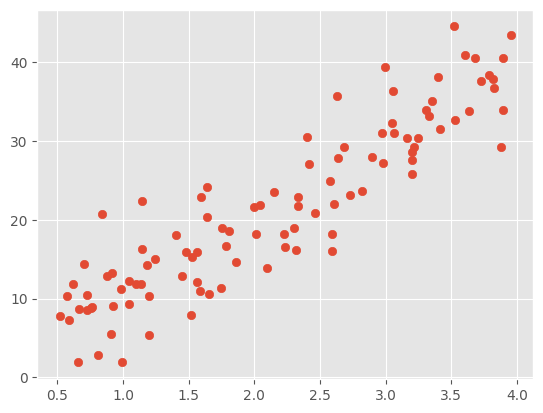

In [67]:
plt.scatter(data_df.studytime, data_df.score )
plt.show()

Calculating the loss function and then calculating gradients and then finding m and b by optimization of the loss function:

```
def loss_function(m,b, points):
    total_erro  = 0
    for i in range(len(points)):
        x = points.iloc[i].studytime
        y = points.iloc[i].Score
        total_error = += (y- (m*x+b))**2
total_error / float(len(points))
```

In [68]:
# loss function and then minimization


# Gradient Descent Function:
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)

    for i in range(n):
        x = points.iloc[i].studytime
        y = points.iloc[i].score

        m_gradient += - (2/n)*x*(y-(m_now*x+b_now))
        b_gradient += - (2/n)*(y-(m_now*x+b_now))

    m = m_now - m_gradient*L
    b = b_now - b_gradient*L

    return m, b

'''
gradient_descent(m_now, b_now, points, L): This function takes the current values of slope (m_now), 
y-intercept (b_now), a DataFrame containing the data points (points), and the learning rate (L) as input. 
It performs gradient descent to update the values of slope and y-intercept. This function calculates the 
gradients of the loss function with respect to m and b for each data point and updates the values of m and b 
using the gradient descent update rule. Here m_gradient and b_gradient are initialized to 0.
'''

'\ngradient_descent(m_now, b_now, points, L): This function takes the current values of slope (m_now), \ny-intercept (b_now), a DataFrame containing the data points (points), and the learning rate (L) as input. \nIt performs gradient descent to update the values of slope and y-intercept. This function calculates the \ngradients of the loss function with respect to m and b for each data point and updates the values of m and b \nusing the gradient descent update rule. Here m_gradient and b_gradient are initialized to 0.\n'

In [76]:
# Initialization:
m = 0
b = 0
L = 0.001
epochs = 300

'''
The slope (m) and y-intercept (b) are initialized to 0. The learning rate (L) is set to 0.0001, 
and the number of epochs (iterations) is set to 300.
'''

'\nThe slope (m) and y-intercept (b) are initialized to 0. The learning rate (L) is set to 0.0001, \nand the number of epochs (iterations) is set to 300.\n'

In [77]:
# Gradient Descent Loop:
for i in range(epochs):
    if i % 10 == 0:
        print(f"Epoch: {i}")
    m, b = gradient_descent(m,b,data_df,L)

'''
This loop runs for the specified number of epochs. In each iteration, 
it calls the gradient_descent function to update the values of m and b. 
The if statement inside the loop is used to print the current epoch every 
50 iterations for monitoring progress.
'''

Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40
Epoch: 50
Epoch: 60
Epoch: 70
Epoch: 80
Epoch: 90
Epoch: 100
Epoch: 110
Epoch: 120
Epoch: 130
Epoch: 140
Epoch: 150
Epoch: 160
Epoch: 170
Epoch: 180
Epoch: 190
Epoch: 200
Epoch: 210
Epoch: 220
Epoch: 230
Epoch: 240
Epoch: 250
Epoch: 260
Epoch: 270
Epoch: 280
Epoch: 290


'\nThis loop runs for the specified number of epochs. In each iteration, \nit calls the gradient_descent function to update the values of m and b. \nThe if statement inside the loop is used to print the current epoch every \n50 iterations for monitoring progress.\n'

In [78]:
print(m)
print(b)

8.491247146461138
3.094949235812092


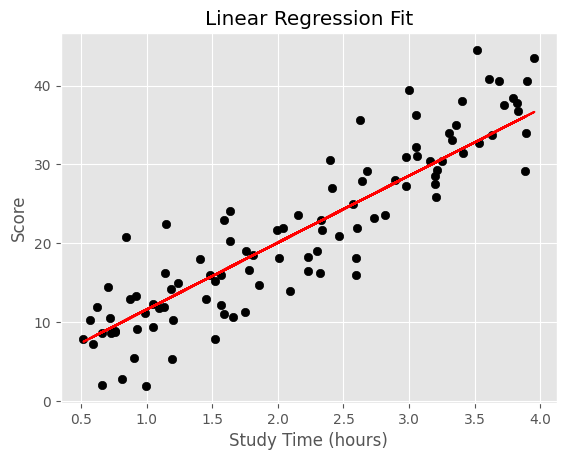

In [79]:
# Plotting the data and fitted line
plt.scatter(data_df.studytime, data_df.score, color="black")
plt.plot(data_df.studytime, m * data_df.studytime + b, color="red")
plt.xlabel('Study Time (hours)')
plt.ylabel('Score')
plt.title('Linear Regression Fit')
plt.show()